In [1]:
import pandas as pd
import warnings
from pandas import Series, DataFrame
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def filter1(s,f):
    if s==f:
        return 0
    else:
        return float(s)
def transfrom(input_data):
    input_data['Coupon_requirement']=input_data['coupon_requirement'].map(lambda x: filter1(x,'null'))
    input_data['Equivalent_discount']=input_data['equivalent_discount'].map(lambda x: filter1(x,'fixed'))
    input_data['Fixed']=input_data['equivalent_discount'].map(lambda x: int(x=='fixed'))
    return input_data.drop(['coupon_requirement','equivalent_discount'],axis=1)

In [3]:

def fillna_pipeline(input_data):
    input_data=transfrom(input_data)
    input_data['Num_coupon_used'].fillna(0,inplace=True)
    input_data['Avg_coupon_got'].fillna(input_data['Avg_coupon_got'].mean(),inplace=True)
    input_data['Difference'].fillna(input_data['Difference'].mean(),inplace=True)
    input_data['money'].fillna(input_data['money'].mean(),inplace=True)
    input_data['Tot_coupon_sent'].fillna(input_data['Tot_coupon_sent'].mean(),inplace=True)
    input_data['num_type'].fillna(input_data['num_type'].mean(),inplace=True)
    input_data["Customer's Total Usage for Merchant's Coupons"].fillna(input_data["Customer's Total Usage for Merchant's Coupons"].mean(),inplace=True)
    input_data["Customer's Total Usage Fraction for Merchant"].fillna(input_data["Customer's Total Usage Fraction for Merchant"].mean(),inplace=True)
    input_data["Customer's Total Received by Merchant"].fillna(input_data["Customer's Total Received by Merchant"].mean(),inplace=True)
    input_data["Merchant's Total Usage Fraction"].fillna(input_data["Merchant's Total Usage Fraction"].mean(),inplace=True)
    input_data["Customer's Inbox Share by Merchant"].fillna(input_data["Customer's Inbox Share by Merchant"].mean(),inplace=True)
    print 'fill completed'
    return input_data

In [9]:
y_train1=pd.read_csv('y_full_train.csv',header=None)
y_test1=pd.read_csv('y_full_test.csv',header=None)
X_train1=fillna_pipeline(pd.read_csv('X_full_train.csv'))
X_test1=fillna_pipeline(pd.read_csv('X_full_test.csv'))

fill completed
fill completed


In [13]:
X_test1[:5]

,User_id,Merchant_id,Coupon_id_x,Date_received_week,Date_received_month,Tot_coupon_sent,Num_coupon_used,num_type,Customer's Total Usage Fraction for Merchant,Customer's Total Usage for Merchant's Coupons,Customer's Total Received by Merchant,Merchant's Total Usage Fraction,Customer's Inbox Share by Merchant,Avg_coupon_got,Difference,money,Coupon_requirement,Equivalent_discount,Fixed
0,15137031,25104,100120354,0,13,20542.0,3015.0,172.0,0.724265,2.055681,3.657247,0.424532,0.669952,0.153846,18.000000,170.000000,150.0,0.666667,0
1,12634431,18907,100060941,1,14,35140.0,7389.0,123.0,0.724265,2.055681,3.657247,0.424532,0.669952,0.267838,32.604163,150.674719,800.0,0.937500,0
2,12634431,18907,100231315,1,14,35140.0,7389.0,123.0,0.724265,2.055681,3.657247,0.424532,0.669952,0.267838,32.604163,150.674719,500.0,0.900000,0
3,12634431,18907,100025195,1,14,35140.0,7389.0,123.0,0.724265,2.055681,3.657247,0.424532,0.669952,0.267838,32.604163,150.674719,1000.0,0.900000,0
4,10131831,47003,fixed,3,28,4505.0,2090.0,36.0,0.500000,2.000000,4.000000,0.463929,1.000000,0.153846,41.000000,85.000000,NaN,0.000000,1


In [33]:
X_train1.shape

(667453, 19)

In [30]:
X_train11 = X_train1.drop(['User_id','Merchant_id','Coupon_id_x'], axis=1)
#y_train11 = y_train1.drop(['User_id','Merchant_id','Coupon_id_x'], axis=1)
X_test11 = X_test1.drop(['User_id','Merchant_id','Coupon_id_x'], axis=1)

In [31]:
GBDT = GradientBoostingClassifier(n_estimators=150,max_depth=5 )
model=GBDT.fit(X_train11, y_train1)
y1_GBDTpredicted_test = GBDT.predict(X_test11)
metrics.accuracy_score(y_test1,y1_GBDTpredicted_test)

0.75618283979985235

In [43]:
X_full_train = pd.read_csv('X_full_train.csv')
y_full_train = pd.read_csv('y_full_train.csv',header=None)
X_full_test = pd.read_csv('X_full_test.csv')
y_full_test = pd.read_csv('y_full_test.csv',header=None)
full_train = pd.read_csv('full_train.csv')
full_test = pd.read_csv('full_test.csv')

In [44]:
X_train1=fillna_pipeline(X_full_train)
X_test1=fillna_pipeline(X_full_test)

fill completed
fill completed


In [45]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292584 entries, 0 to 292583
Data columns (total 19 columns):
User_id                                          292584 non-null int64
Merchant_id                                      292584 non-null int64
Coupon_id_x                                      292584 non-null object
Date_received_week                               292584 non-null int64
Date_received_month                              292584 non-null int64
Tot_coupon_sent                                  292584 non-null float64
Num_coupon_used                                  292584 non-null float64
num_type                                         292584 non-null float64
Customer's Total Usage Fraction for Merchant     292584 non-null float64
Customer's Total Usage for Merchant's Coupons    292584 non-null float64
Customer's Total Received by Merchant            292584 non-null float64
Merchant's Total Usage Fraction                  292584 non-null float64
Customer's Inbox Share

## my code

In [7]:
X_train111.columns

Index([u'Date_received_week', u'Date_received_month', u'Tot_coupon_sent',
       u'Num_coupon_used', u'num_type',
       u'Customer's Total Usage Fraction for Merchant',
       u'Customer's Total Usage for Merchant's Coupons',
       u'Customer's Total Received by Merchant',
       u'Merchant's Total Usage Fraction',
       u'Customer's Inbox Share by Merchant', u'Avg_coupon_got',
       u'Coupon_requirement', u'Equivalent_discount', u'Fixed'],
      dtype='object')

In [31]:
X_train1 = X_train1.drop(['User_id','Merchant_id','Coupon_id_x','Avg_coupon_got','Difference','money'], axis=1)
X_test1 = X_test1.drop(['User_id','Merchant_id','Coupon_id_x','Avg_coupon_got','Difference','money'], axis=1)

In [32]:
X_train111.columns

Index([u'Date_received_week', u'Date_received_month', u'Tot_coupon_sent',
       u'Num_coupon_used', u'num_type',
       u'Customer's Total Usage Fraction for Merchant',
       u'Customer's Total Usage for Merchant's Coupons',
       u'Customer's Total Received by Merchant',
       u'Merchant's Total Usage Fraction',
       u'Customer's Inbox Share by Merchant', u'Coupon_requirement',
       u'Equivalent_discount', u'Fixed'],
      dtype='object')

AUC socre for GBDT is  0.835653604348


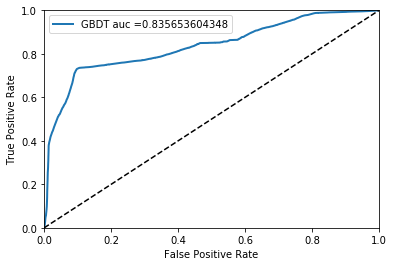

In [34]:
# GBDT
GBDT = GradientBoostingClassifier(n_estimators=150,max_depth=5 )
model=GBDT.fit(X_train111, y_train1)
y1_GBDTpredicted_test = GBDT.predict(X_test111)
metrics.accuracy_score(y_test1,y1_GBDTpredicted_test)
score=GBDT.predict_proba(X_test111)
score_GDBT=[]
for i in score:
    score_GDBT.append(i[1])

from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


fpr, tpr, thresholds = roc_curve(y_test1, score_GDBT)
auc = roc_auc_score(y_test1, score_GDBT)
plot_roc_curve(fpr, tpr, 'GBDT auc =', auc)
print 'AUC socre for GBDT is ', str(auc)

plt.legend(loc=0)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print 'accuracy rate is ', metrics.accuracy_score(y_test1, y1_GBDTpredicted_test)

accuracy rate is  0.757197932901


In [ ]:
print 10

AUC socre for XG is  0.835086201034
[ 0.10771657  0.19125259  0.10545354  0.04559021  0.07511649  0.05073103
  0.01781912  0.03173585  0.09948414  0.09616978  0.08946088  0.08946979
  0.        ]


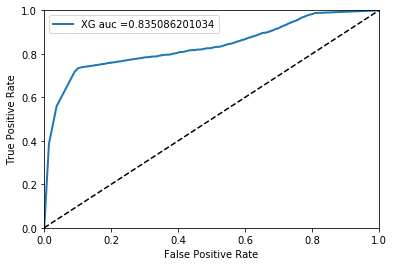

In [35]:
# xgb
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
gbm = xgb.XGBClassifier(max_depth=15)
GBM_model=gbm.fit(X_train111, y_train1)
score_1=GBM_model.predict_proba(X_test111)
score_XG=[]
for i in score_1:
    score_XG.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_XG)
auc = roc_auc_score(y_test1, score_XG)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'AUC socre for XG is ', str(auc)
plt.legend(loc=0)
# 0.959
print GBM_model.feature_importances_

In [40]:
y1_XGBpredicted_test = gbm.predict(X_test111)
print 'accuracy rate is ', metrics.accuracy_score(y_test1, y1_XGBpredicted_test)

accuracy rate is  0.752703497115


AUC socre for AB is  0.842562749608


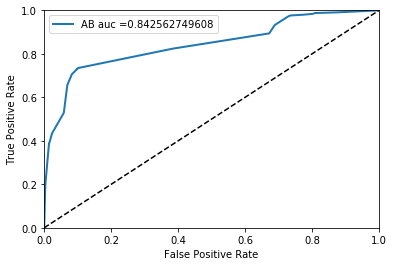

In [47]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=100)
ABC.fit(X_train111, y_train1)
score3=ABC.predict_proba(X_test111)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'AB auc =', auc)
print 'AUC socre for AB is ', str(auc)
plt.legend(loc=0)

In [41]:
y1_ABC_predicted = ABC.predict(X_test111)
print 'accuracy rate is ', metrics.accuracy_score(y_test1, y1_ABC_predicted)

accuracy rate is  0.751312443606


In [6]:
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
plt.figure(0).clf()

fpr, tpr, thresholds = roc_curve(y_test1, score_GDBT)
auc = roc_auc_score(y_test1, score_GDBT)
plot_roc_curve(fpr, tpr, 'GBDT auc =', auc)
print 'AUC socre for GBDT is ', str(auc)

fpr, tpr, thresholds = roc_curve(y_test1, score_XG)
auc = roc_auc_score(y_test1, score_XG)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'AUC socre for XG is ', str(auc)

fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'AB auc =', auc)
print 'AUC socre for AB is ', str(auc)
plt.legend(loc=0)


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import roc_curve, roc_auc_score

In [19]:
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [53]:
X_train1 = X_train1.drop(['User_id','Merchant_id','Coupon_id_x','Avg_coupon_got','Difference','money'], axis=1)
X_test1 = X_test1.drop(['User_id','Merchant_id','Coupon_id_x','Avg_coupon_got','Difference','money'], axis=1)

In [47]:
X_train1.fillna(0, inplace=True)
X_test1.fillna(0,inplace=True)

In [48]:
X_train111 = X_train1.drop(['User_id','Merchant_id','Coupon_id_x'], axis=1)
X_test111 = X_test1.drop(['User_id','Merchant_id','Coupon_id_x'], axis=1)

AUC socre for MLP is  0.737183398797
accuracy rate is  0.578356984661


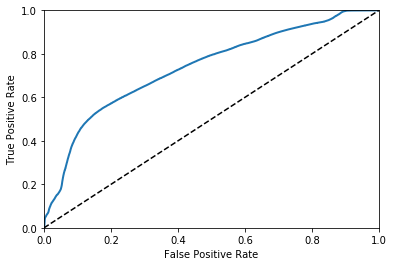

In [49]:

y_train1 =y_full_train

y_test1 = y_full_test
# mlp
Scaler = StandardScaler()
sX_train1 = Scaler.fit_transform(X_train111)
sX_train1 = pd.DataFrame(sX_train1)
sX_test1 = Scaler.transform(X_test111)
sX_test1 = pd.DataFrame(sX_test1)
mlp = MLPClassifier(hidden_layer_sizes=(25,25,25,25,25,15), activation='tanh', solver='sgd', learning_rate='adaptive',
                    batch_size=1000, learning_rate_init=0.05,momentum=0.7, nesterovs_momentum=True)
MLP_model=mlp.fit(sX_train1,y_train1)
y1_mlp_predicted = mlp.predict(sX_test1)
score2=MLP_model.predict_proba(sX_test1)
score_NN=[]
for i in score2:
    score_NN.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_NN)
auc = roc_auc_score(y_test1, score_NN)
plot_roc_curve(fpr, tpr, 'MLP accuracy =', metrics.accuracy_score(y_test1, y1_mlp_predicted))
print 'AUC socre for MLP is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_mlp_predicted))

AUC socre for RF model is  0.72194260548
accuracy rate is  0.717886145517
AUC socre for MLP is  0.53653188732
accuracy rate is  0.349694446723
AUC socre for GBDT is  0.809379488366
accuracy rate is  0.675566674869
AUC socre for XG is  0.817288048164
accuracy rate is  0.678085609603
AUC socre for AB is  0.551425128318
accuracy rate is  0.704949689662
AUC socre for combining model is  0.838362138795
accuracy rate is  0.753499849616


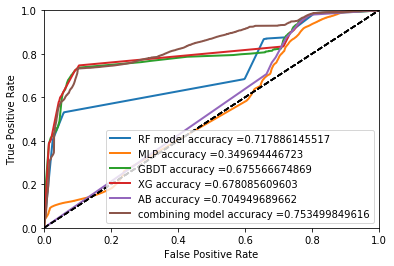

In [54]:
plt.figure(0).clf()
#X_train111= X_train1
#y_train1 =y_full_train
#X_test111 = X_test1
#y_test1 = y_full_test
# Random Forest 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=1, max_features=5)
RF.fit(X_train1, y_train1)
y1_RFpredicted_test = RF.predict(X_test1)
score3=RF.predict_proba(X_test1)
score_RF=[]
for i in score3:
    score_RF.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_RF)
auc = roc_auc_score(y_test1, score_RF)
plot_roc_curve(fpr, tpr, 'RF model accuracy =', metrics.accuracy_score(y_test1, y1_RFpredicted_test))
print 'AUC socre for RF model is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_RFpredicted_test))

# mlp
Scaler = StandardScaler()
sX_train1 = Scaler.fit_transform(X_train111)
sX_train1 = pd.DataFrame(sX_train1)
sX_test1 = Scaler.transform(X_test111)
sX_test1 = pd.DataFrame(sX_test1)
mlp = MLPClassifier(hidden_layer_sizes=(25,25,25,25,25,15), activation='tanh', solver='sgd', learning_rate='adaptive',
                    batch_size=1000, learning_rate_init=0.05,momentum=0.7, nesterovs_momentum=True)
MLP_model=mlp.fit(sX_train1,y_train1)
y1_mlp_predicted = mlp.predict(sX_test1)
score2=MLP_model.predict_proba(sX_test1)
score_NN=[]
for i in score2:
    score_NN.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_NN)
auc = roc_auc_score(y_test1, score_NN)
plot_roc_curve(fpr, tpr, 'MLP accuracy =', metrics.accuracy_score(y_test1, y1_mlp_predicted))
print 'AUC socre for MLP is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_mlp_predicted))
# GBDT
GBDT = GradientBoostingClassifier(n_estimators=100,max_depth=1)
model=GBDT.fit(X_train111, y_train1)
y1_GBDTpredicted_test = GBDT.predict(X_test111)
score=GBDT.predict_proba(X_test111)
score_GDBT=[]
for i in score:
    score_GDBT.append(i[1])

fpr, tpr, thresholds = roc_curve(y_test1, score_GDBT)
auc = roc_auc_score(y_test1, score_GDBT)
plot_roc_curve(fpr, tpr, 'GBDT accuracy =', metrics.accuracy_score(y_test1,y1_GBDTpredicted_test))
print 'AUC socre for GBDT is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1,y1_GBDTpredicted_test))

import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
gbm = xgb.XGBClassifier(n_estimators=20,max_depth=2)
GBM_model=gbm.fit(X_train1, y_train1)
score_1=GBM_model.predict_proba(X_test1)
y1_XGBpredicted_test = GBM_model.predict(X_test1)
score_XG=[]
for i in score_1:
    score_XG.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_XG)
auc = roc_auc_score(y_test1, score_XG)
plot_roc_curve(fpr, tpr, 'XG accuracy =', metrics.accuracy_score(y_test1, y1_XGBpredicted_test))
print 'AUC socre for XG is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_XGBpredicted_test))

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         #algorithm="SAMME",
                         learning_rate =0.05,
                         n_estimators=10)
ABC.fit(X_train1, y_train1)
y1_ABpredicted_test = ABC.predict(X_test1)

score3=ABC.predict_proba(X_test1)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'AB accuracy =', metrics.accuracy_score(y_test1, y1_ABpredicted_test))
print 'AUC socre for AB is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_ABpredicted_test))

# bending model
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         #algorithm="SAMME",
                         learning_rate =1,
                         n_estimators=100)
ABC.fit(X_train1, y_train1)
y1_ABpredicted_test = ABC.predict(X_test1)

score3=ABC.predict_proba(X_test1)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'combining model accuracy =', metrics.accuracy_score(y_test1, y1_ABpredicted_test))
print 'AUC socre for combining model is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_ABpredicted_test))

plt.legend(loc=0)

AUC socre for MLP is  0.623167113619


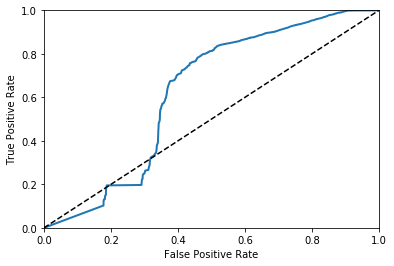

In [34]:
#X_full_train = pd.read_csv('X_full_train.csv')
#y_full_train = pd.read_csv('y_full_train.csv',header=None)
#X_full_test = pd.read_csv('X_full_test.csv')
#y_full_test = pd.read_csv('y_full_test.csv',header=None)
#full_train = pd.read_csv('full_train.csv')
#full_test = pd.read_csv('full_test.csv')
#X_train1=fillna_pipeline(X_full_train)
#X_test1=fillna_pipeline(X_full_test)


Scaler = StandardScaler()
sX_train1 = Scaler.fit_transform(X_train111)
sX_train1 = pd.DataFrame(sX_train1)
sX_test1 = Scaler.transform(X_test111)
sX_test1 = pd.DataFrame(sX_test1)
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,8,8,5), activation='relu', solver='sgd', learning_rate='adaptive',
                    batch_size=1000, learning_rate_init=0.05)
MLP_model=mlp.fit(sX_train1,y_full_train)
score2=MLP_model.predict_proba(sX_test1)
score_NN=[]
for i in score2:
    score_NN.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_full_test, score_NN)
auc = roc_auc_score(y_full_test, score_NN)
plot_roc_curve(fpr, tpr, 'MLP auc =', auc)
print 'AUC socre for MLP is ', str(auc)

AUC socre for GBDT is  0.709267083061


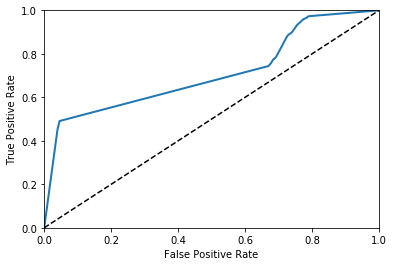

In [9]:
GBDT = GradientBoostingClassifier(n_estimators=10,max_depth=1)
model=GBDT.fit(X_train111, y_train1)
y1_GBDTpredicted_test = GBDT.predict(X_test111)
metrics.accuracy_score(y_test1,y1_GBDTpredicted_test)
score=GBDT.predict_proba(X_test111)
score_GDBT=[]
for i in score:
    score_GDBT.append(i[1])

fpr, tpr, thresholds = roc_curve(y_test1, score_GDBT)
auc = roc_auc_score(y_test1, score_GDBT)
plot_roc_curve(fpr, tpr, 'GBDT auc =', auc)
print 'AUC socre for GBDT is ', str(auc)

AUC socre for XG is  0.807925751363


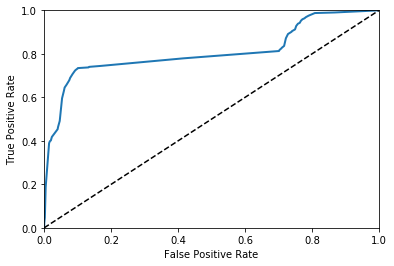

In [12]:
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
gbm = xgb.XGBClassifier(n_estimators=100,max_depth=1)
GBM_model=gbm.fit(X_train111, y_train1)
score_1=GBM_model.predict_proba(X_test111)
score_XG=[]
for i in score_1:
    score_XG.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_XG)
auc = roc_auc_score(y_test1, score_XG)
plot_roc_curve(fpr, tpr, 'XG auc =', auc)
print 'AUC socre for XG is ', str(auc)

AUC socre for AB is  0.828793565337


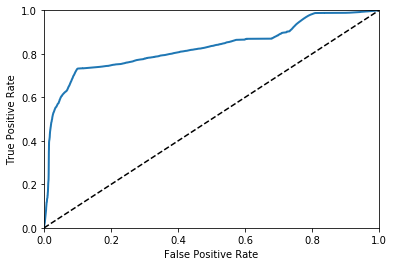

In [19]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         learning_rate =1,
                         #algorithm="SAMME",
                         n_estimators=100)
ABC.fit(X_train111, y_train1)
score3=ABC.predict_proba(X_test111)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'AB auc =', auc)
print 'AUC socre for AB is ', str(auc)

In [ ]:
from sklearn.svm import SVC
GaussianSVC = SVC(C=0.5, probability=True)
GaussianSVC.fit(X_train111[:100000], y_train1[:100000])
score4=GaussianSVC.predict_proba(X_test111[:1000])
score_SVC=[]
for i in score4:
    score_SVC.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1[:1000], score_SVC)
auc = roc_auc_score(y_test1[:1000], score_SVC)
plot_roc_curve(fpr, tpr, 'SVC auc =', auc)
print 'AUC socre for SVC is ', str(auc)
#plt.legend(loc=0)

AUC socre for AB is  0.485567833357


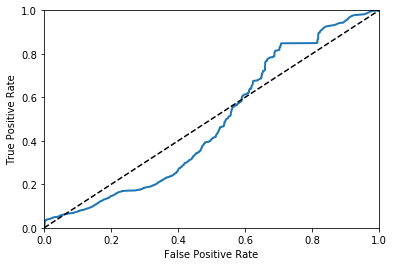

In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train111, y_train1)
score3=LR.predict_proba(X_test111)
score_LR=[]
for i in score3:
    score_LR.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_LR)
auc = roc_auc_score(y_test1, score_LR)
plot_roc_curve(fpr, tpr, 'AB auc =', auc)
print 'AUC socre for AB is ', str(auc)

In [4]:
offline_train=pd.read_csv('offline_train.csv')
offline_test = pd.read_csv('offline_test.csv')

In [20]:
offline_train_y = pd.read_csv('offline_train_y.csv')
offline_test_y = pd.read_csv('offline_test_y.csv')
#offline_train_x=fillna_pipeline(offline_train)
#offline_test_x=fillna_pipeline(offline_test)

In [25]:
del offline_train['Date_received_month']
del offline_test['Date_received_month']

In [42]:
offline_y_train = pd.read_csv('offline_y_train2.csv',header=None)
offline_y_test = pd.read_csv('offline_y_test2.csv',header=None)
offline_X_train = pd.read_csv('offline_X_train2.csv')
offline_X_test = pd.read_csv('offline_X_test2.csv')

In [43]:
offline_y_train.shape

(95888, 1)

In [44]:
#offline_train_x=fillna_pipeline(offline_train)
#offline_test_x=fillna_pipeline(offline_test)

In [45]:
del offline_X_train['Date_received_month']
del offline_X_test['Date_received_month']

AUC socre for RF is  0.572310279087
accuracy rate is  0.574450860367


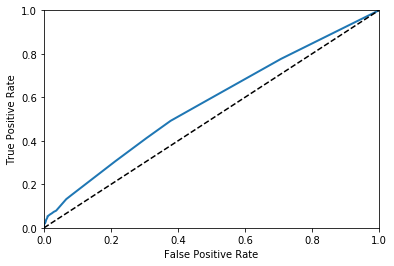

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth =1)
RF.fit(offline_X_train, offline_y_train)
y1_RFpredicted_test = RF.predict(offline_X_test)
score3=RF.predict_proba(offline_X_test)
score_RF=[]
for i in score3:
    score_RF.append(i[1])
fpr, tpr, thresholds = roc_curve(offline_y_test, score_RF)
auc = roc_auc_score(offline_y_test, score_RF)
plot_roc_curve(fpr, tpr, 'RF auc =', auc)
print 'AUC socre for RF is ', str(auc)
print 'accuracy rate is ', metrics.accuracy_score(offline_y_test, y1_RFpredicted_test)

AUC socre for RF is  0.616018304834
accuracy rate is  0.570568263488
AUC socre for MLP is  0.552971292078
accuracy rate is  0.574450860367
AUC socre for GBDT is  0.588121354213
accuracy rate is  0.574450860367
AUC socre for XG is  0.603229200608
accuracy rate is  0.574244339256
AUC socre for AB is  0.59223514774
accuracy rate is  0.574450860367
AUC socre for combining model is  0.599955472008
accuracy rate is  0.573038255971


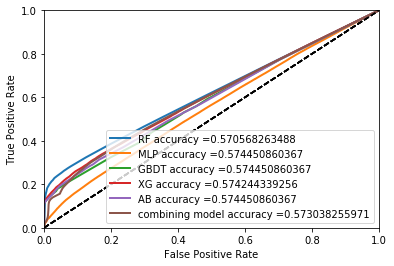

In [60]:
plt.figure(0).clf()
X_train111 =offline_X_train
y_train1 =offline_y_train
X_test111 = offline_X_test
y_test1 = offline_y_test
# Random Forest 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train111, y_train1)
y1_RFpredicted_test = RF.predict(X_test111)
score3=RF.predict_proba(X_test111)
score_RF=[]
for i in score3:
    score_RF.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_RF)
auc = roc_auc_score(y_test1, score_RF)
plot_roc_curve(fpr, tpr, 'RF accuracy =', metrics.accuracy_score(y_test1, y1_RFpredicted_test))
print 'AUC socre for RF is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_RFpredicted_test))

# mlp
Scaler = StandardScaler()
sX_train1 = Scaler.fit_transform(X_train111)
sX_train1 = pd.DataFrame(sX_train1)
sX_test1 = Scaler.transform(X_test111)
sX_test1 = pd.DataFrame(sX_test1)
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,8,8,5), activation='relu', solver='sgd', learning_rate='adaptive',
                    batch_size=1000, learning_rate_init=0.05)
MLP_model=mlp.fit(sX_train1,y_train1)
y1_mlp_predicted = mlp.predict(sX_test1)
score2=MLP_model.predict_proba(sX_test1)
score_NN=[]
for i in score2:
    score_NN.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_NN)
auc = roc_auc_score(y_test1, score_NN)
plot_roc_curve(fpr, tpr, 'MLP accuracy =', metrics.accuracy_score(y_test1, y1_mlp_predicted))
print 'AUC socre for MLP is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_mlp_predicted))
# GBDT
GBDT = GradientBoostingClassifier(n_estimators=100,max_depth=1)
model=GBDT.fit(X_train111, y_train1)
y1_GBDTpredicted_test = GBDT.predict(X_test111)
score=GBDT.predict_proba(X_test111)
score_GDBT=[]
for i in score:
    score_GDBT.append(i[1])

fpr, tpr, thresholds = roc_curve(y_test1, score_GDBT)
auc = roc_auc_score(y_test1, score_GDBT)
plot_roc_curve(fpr, tpr, 'GBDT accuracy =', metrics.accuracy_score(y_test1,y1_GBDTpredicted_test))
print 'AUC socre for GBDT is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1,y1_GBDTpredicted_test))

import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
gbm = xgb.XGBClassifier(n_estimators=100,max_depth=2)
GBM_model=gbm.fit(X_train111, y_train1)
score_1=GBM_model.predict_proba(X_test111)
y1_XGBpredicted_test = GBM_model.predict(X_test111)
score_XG=[]
for i in score_1:
    score_XG.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_XG)
auc = roc_auc_score(y_test1, score_XG)
plot_roc_curve(fpr, tpr, 'XG accuracy =', metrics.accuracy_score(y_test1, y1_XGBpredicted_test))
print 'AUC socre for XG is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_XGBpredicted_test))

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         #algorithm="SAMME",
                         learning_rate =0.05,
                         n_estimators=10)
ABC.fit(X_train111, y_train1)
y1_ABpredicted_test = ABC.predict(X_test111)

score3=ABC.predict_proba(X_test111)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'AB accuracy =', metrics.accuracy_score(y_test1, y1_ABpredicted_test))
print 'AUC socre for AB is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_ABpredicted_test))

# bending model
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         #algorithm="SAMME",
                         learning_rate =1,
                         n_estimators=100)
ABC.fit(X_train111, y_train1)
y1_ABpredicted_test = ABC.predict(X_test111)

score3=ABC.predict_proba(X_test111)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'combining model accuracy =', metrics.accuracy_score(y_test1, y1_ABpredicted_test))
print 'AUC socre for combining model is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_ABpredicted_test))

plt.legend(loc=0)

AUC socre for RF is  0.616147441918
accuracy rate is  0.571237391886
AUC socre for MLP is  0.556988244725
accuracy rate is  0.574450860367
AUC socre for GBDT is  0.588121354213
accuracy rate is  0.574450860367
AUC socre for XG is  0.603229200608
accuracy rate is  0.574244339256
AUC socre for AB is  0.59223514774
accuracy rate is  0.574450860367
AUC socre for combining model is  0.599952366681
accuracy rate is  0.573038255971


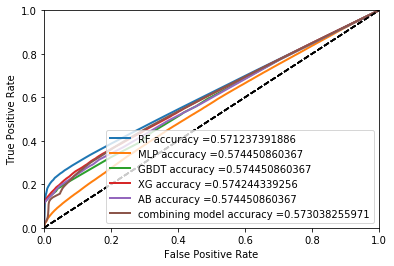

In [61]:
plt.figure(0).clf()
X_train111 =offline_X_train
y_train1 =offline_y_train
X_test111 = offline_X_test
y_test1 = offline_y_test
# Random Forest 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train111, y_train1)
y1_RFpredicted_test = RF.predict(X_test111)
score3=RF.predict_proba(X_test111)
score_RF=[]
for i in score3:
    score_RF.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_RF)
auc = roc_auc_score(y_test1, score_RF)
plot_roc_curve(fpr, tpr, 'RF accuracy =', metrics.accuracy_score(y_test1, y1_RFpredicted_test))
print 'AUC socre for RF is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_RFpredicted_test))

# mlp
Scaler = StandardScaler()
sX_train1 = Scaler.fit_transform(X_train111)
sX_train1 = pd.DataFrame(sX_train1)
sX_test1 = Scaler.transform(X_test111)
sX_test1 = pd.DataFrame(sX_test1)
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,8,8,5), activation='relu', solver='sgd', learning_rate='adaptive',
                    batch_size=1000, learning_rate_init=0.05)
MLP_model=mlp.fit(sX_train1,y_train1)
y1_mlp_predicted = mlp.predict(sX_test1)
score2=MLP_model.predict_proba(sX_test1)
score_NN=[]
for i in score2:
    score_NN.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_NN)
auc = roc_auc_score(y_test1, score_NN)
plot_roc_curve(fpr, tpr, 'MLP accuracy =', metrics.accuracy_score(y_test1, y1_mlp_predicted))
print 'AUC socre for MLP is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_mlp_predicted))
# GBDT
GBDT = GradientBoostingClassifier(n_estimators=100,max_depth=1)
model=GBDT.fit(X_train111, y_train1)
y1_GBDTpredicted_test = GBDT.predict(X_test111)
score=GBDT.predict_proba(X_test111)
score_GDBT=[]
for i in score:
    score_GDBT.append(i[1])

fpr, tpr, thresholds = roc_curve(y_test1, score_GDBT)
auc = roc_auc_score(y_test1, score_GDBT)
plot_roc_curve(fpr, tpr, 'GBDT accuracy =', metrics.accuracy_score(y_test1,y1_GBDTpredicted_test))
print 'AUC socre for GBDT is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1,y1_GBDTpredicted_test))

import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
gbm = xgb.XGBClassifier(n_estimators=100,max_depth=2)
GBM_model=gbm.fit(X_train111, y_train1)
score_1=GBM_model.predict_proba(X_test111)
y1_XGBpredicted_test = GBM_model.predict(X_test111)
score_XG=[]
for i in score_1:
    score_XG.append(i[1])
    
fpr, tpr, thresholds = roc_curve(y_test1, score_XG)
auc = roc_auc_score(y_test1, score_XG)
plot_roc_curve(fpr, tpr, 'XG accuracy =', metrics.accuracy_score(y_test1, y1_XGBpredicted_test))
print 'AUC socre for XG is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_XGBpredicted_test))

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         #algorithm="SAMME",
                         learning_rate =0.05,
                         n_estimators=10)
ABC.fit(X_train111, y_train1)
y1_ABpredicted_test = ABC.predict(X_test111)

score3=ABC.predict_proba(X_test111)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'AB accuracy =', metrics.accuracy_score(y_test1, y1_ABpredicted_test))
print 'AUC socre for AB is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_ABpredicted_test))

# bending model
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         #algorithm="SAMME",
                         learning_rate =1,
                         n_estimators=100)
ABC.fit(X_train111, y_train1)
y1_ABpredicted_test = ABC.predict(X_test111)

score3=ABC.predict_proba(X_test111)
score_AB=[]
for i in score3:
    score_AB.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_AB)
auc = roc_auc_score(y_test1, score_AB)
plot_roc_curve(fpr, tpr, 'combining model accuracy =', metrics.accuracy_score(y_test1, y1_ABpredicted_test))
print 'AUC socre for combining model is ', auc
print 'accuracy rate is ', str(metrics.accuracy_score(y_test1, y1_ABpredicted_test))

plt.legend(loc=0)

In [ ]:
# SVM
from sklearn.svm import SVC
GaussianSVC = SVC(kernel='rbf',C=2)
GaussianSVC.fit(sX_train1, y_train1)
score4=GaussianSVC.predict_proba(sX_test1)
score_SVC=[]
for i in score4:
    score_SVC.append(i[1])
fpr, tpr, thresholds = roc_curve(y_test1, score_SVC)
auc = roc_auc_score(y_test1, score_SVC)
plot_roc_curve(fpr, tpr, 'SVC auc =', auc)
print 'AUC socre for SVC is ', str(auc)
plt.legend(loc=0)

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from random import shuffle
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score
import pickle
import time
from hyperopt import fmin, tpe, hp,space_eval,rand,Trials,partial,STATUS_OK




def GBM(argsDict):
    max_depth = argsDict["max_depth"] + 5
    n_estimators = argsDict['n_estimators'] * 5 + 50
    learning_rate = argsDict["learning_rate"] * 0.02 + 0.05
    subsample = argsDict["subsample"] * 0.1 + 0.7
    min_child_weight = argsDict["min_child_weight"]+1
    ada_estimators = argsDict['ada_estimators'] * 10 + 100
    ada_depth = argsDict["ada_depth"] 
    ada_para=argsDict["ada_para"] 
    
    print "max_depth:" + str(max_depth)
    print "n_estimator:" + str(n_estimators)
    print "learning_rate:" + str(learning_rate)
    print "subsample:" + str(subsample)
    print "min_child_weight:" + str(min_child_weight)
    print 'ada_estimators'+str(ada_estimators)
    print 'ada_depth'+str(ada_depth)
    print 'ada_para'+str(ada_para)
    
    gbm = xgb.XGBClassifier(nthread=4,   
                            max_depth=max_depth,  
                            n_estimators=n_estimators,  
                            learning_rate=learning_rate, 
                            subsample=subsample,      
                            min_child_weight=min_child_weight,   
                            max_delta_step = 10,  
                            objective="binary:logistic")
    ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=ada_depth),
                         algorithm="SAMME",
                         n_estimators=ada_estimators)
    ABC_model1=gbm.fit(X_train111, y_train1)
    scoreADA1=ABC_model1.predict_proba(X_test111)
    
    GBM_model1=gbm.fit(X_train111, y_train1)
    scoreGBM1=GBM_model1.predict_proba(X_test111)
    final_score1=scoreADA1*ada_para+scoreGBM1*(1-ada_para)
    score_1=[]
    for i in final_score1:
        score_1.append(i[1])
        
    ABC_model2=gbm.fit(X_train111, y_train1)
    scoreADA2=ABC_model1.predict_proba(X_test111)
    
    GBM_model2=gbm.fit(X_train111, y_train1)
    scoreGBM2=GBM_model2.predict_proba(X_test111)
    final_score2=scoreADA2*ada_para+scoreGBM2*(1-ada_para)
    score_2=[]
    for i in final_score2:
        score_2.append(i[1]) 



    metric = (roc_auc_score(y_test1, score_1)+roc_auc_score(y_test1, score_2))/2
    print metric
    return -metric

space = {"max_depth":hp.randint("max_depth",15),
         "n_estimators":hp.randint("n_estimators",10),  #[0,1,2,3,4,5] -> [50,]
         "learning_rate":hp.randint("learning_rate",6),  #[0,1,2,3,4,5] -> 0.05,0.06
         "subsample":hp.randint("subsample",4),#[0,1,2,3] -> [0.7,0.8,0.9,1.0]
         "min_child_weight":hp.randint("min_child_weight",5), #
         "ada_depth":hp.randint("ada_depth",5),
         "ada_estimators":hp.randint("ada_estimators",10),
         "ada_para":hp.uniform("ada_para",0,1)
        }
algo = partial(tpe.suggest,n_startup_jobs=1)
best = fmin(GBM,space,algo=algo,max_evals=4)

print best
print GBM(best)

max_depth:11
n_estimator:80
learning_rate:0.13
subsample:1.0
min_child_weight:1
ada_estimators100
ada_depth2
ada_para0.444154284047
0.842103725696
max_depth:11
n_estimator:80
learning_rate:0.13
subsample:1.0
min_child_weight:1
ada_estimators100
ada_depth2
ada_para0.426468084993
0.842103725237
max_depth:11
n_estimator:80
learning_rate:0.13
subsample:0.9
min_child_weight:2
ada_estimators180
ada_depth2
ada_para0.764064567747
0.845438556053
max_depth:8
n_estimator:95
learning_rate:0.11
subsample:0.9
min_child_weight:2
ada_estimators180
ada_depth0
ada_para0.834965213433
0.845436174153
{'ada_depth': 2, 'ada_estimators': 8, 'learning_rate': 4, 'ada_para': 0.7640645677468523, 'min_child_weight': 1, 'n_estimators': 6, 'subsample': 2, 'max_depth': 6}
max_depth:11
n_estimator:80
learning_rate:0.13
subsample:0.9
min_child_weight:2
ada_estimators180
ada_depth2
ada_para0.764064567747
0.845438556053
-0.845438556053


In [ ]:

gbm = xgb.XGBClassifier(max_depth=11,
                    n_estimator=80,
                    learning_rate=0.13,
                    subsample=0.9,
                    min_child_weight=2,
                    ada_estimators180,
                    ada_depth2,
                    ada_para=0.764064567747)